In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_csv("titanic.csv")

In [23]:
# Drop irrelevant features
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)


In [24]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-24-eafdf4c27132>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-24-eafdf4c27132>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [25]:
# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])        # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])

In [26]:
# Normalize numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Final dataset
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2


In [27]:

# 1 KMeans Clustering

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette:.3f}")


# 2 Agglomerative Clustering

agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X)
agg_silhouette = silhouette_score(X, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette:.3f}")

KMeans Silhouette Score: 0.569
Agglomerative Clustering Silhouette Score: 0.553


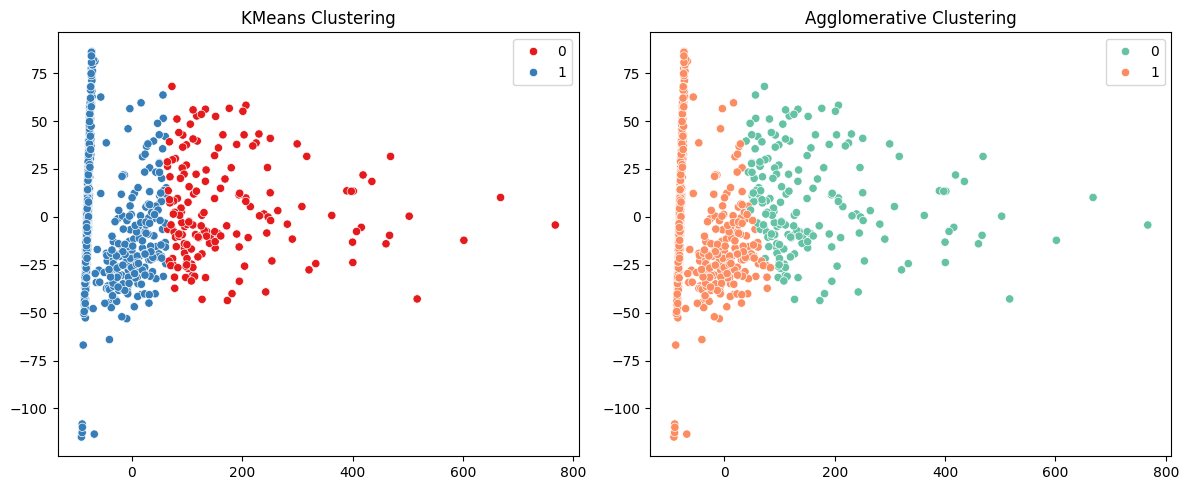

In [28]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot KMeans clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1')
plt.title('KMeans Clustering')

# Plot Agglomerative clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agg_labels, palette='Set2')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
# Apply SelectKBest with chi2
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()

print(" Selected features:", selected_features)

 Selected features: ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']


Class Distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


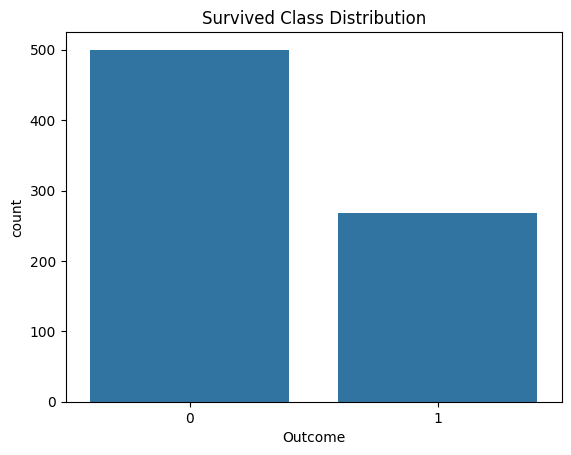

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check target class distribution
class_counts = y.value_counts()
print("Class Distribution:\n", class_counts)

# Plot
sns.countplot(x=y)
plt.title("Survived Class Distribution")
plt.show()


In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Technique 1: SMOTE (Over-Sampling)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("After SMOTE:", y_smote.value_counts())

# Technique 2: Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print("After Random UnderSampling:", y_rus.value_counts())


After SMOTE: Outcome
1    500
0    500
Name: count, dtype: int64
After Random UnderSampling: Outcome
0    268
1    268
Name: count, dtype: int64


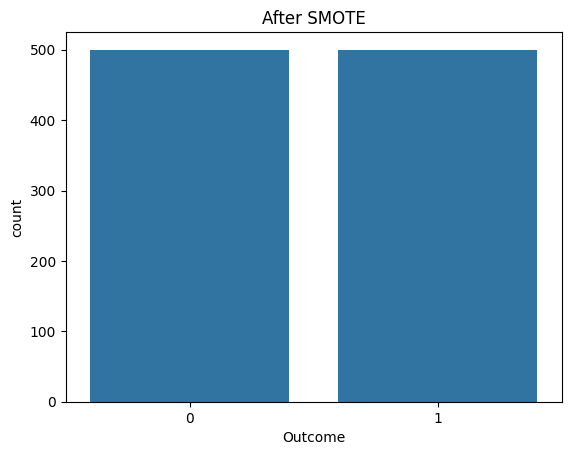

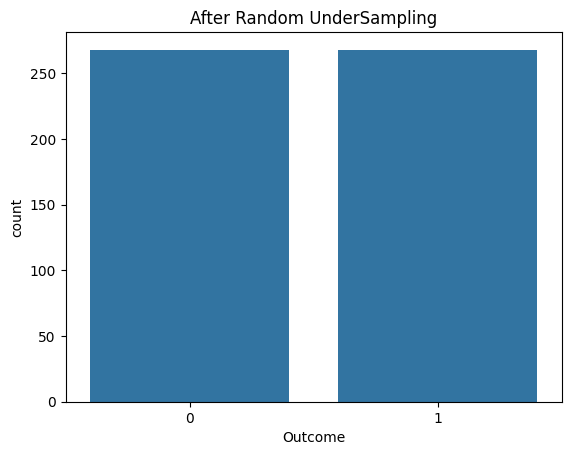

In [32]:
# SMOTE
sns.countplot(x=y_smote)
plt.title("After SMOTE")
plt.show()

# RUS
sns.countplot(x=y_rus)
plt.title("After Random UnderSampling")
plt.show()


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use SMOTE-balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



 Logistic Regression Results:
Accuracy: 0.75
Confusion Matrix:
 [[73 26]
 [24 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74        99
           1       0.75      0.76      0.75       101

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200


 Decision Tree Results:
Accuracy: 0.745
Confusion Matrix:
 [[72 27]
 [24 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74        99
           1       0.74      0.76      0.75       101

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200


 Random Forest Results:
Accuracy: 0.835
Confusion Matrix:
 [[74 25]
 [ 8 93]]
Classification Report:
               precision    recal

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:11:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.75      0.74      0.74        99
           1       0.75      0.76      0.75       101

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



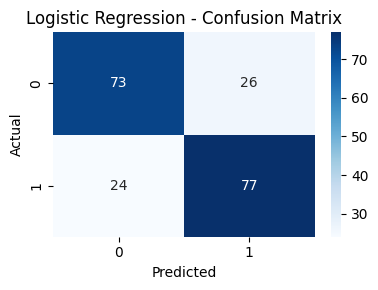


 Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        99
           1       0.74      0.76      0.75       101

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



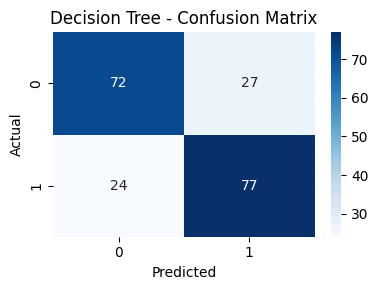


 Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        99
           1       0.79      0.92      0.85       101

    accuracy                           0.83       200
   macro avg       0.85      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



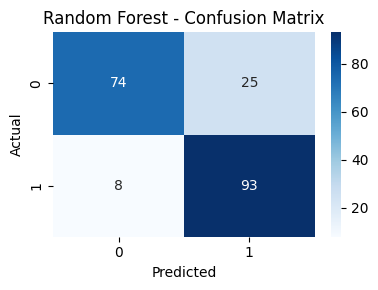


 Gradient Boosting - Classification Report
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.77      0.83      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



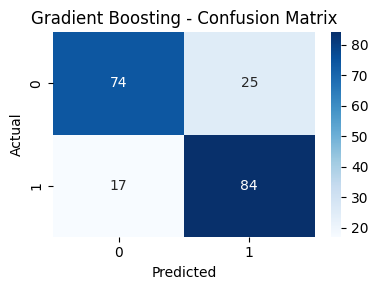


 XGBoost - Classification Report
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        99
           1       0.79      0.91      0.84       101

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



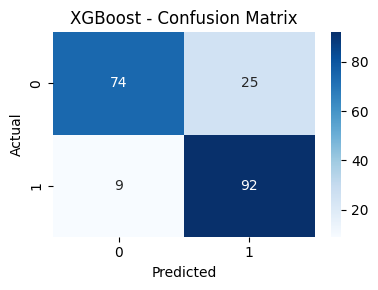


 Summary of Performance Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression     0.750   0.747573  0.762376  0.754902
1        Decision Tree     0.745   0.740385  0.762376  0.751220
2        Random Forest     0.835   0.788136  0.920792  0.849315
3    Gradient Boosting     0.790   0.770642  0.831683  0.800000
4              XGBoost     0.830   0.786325  0.910891  0.844037


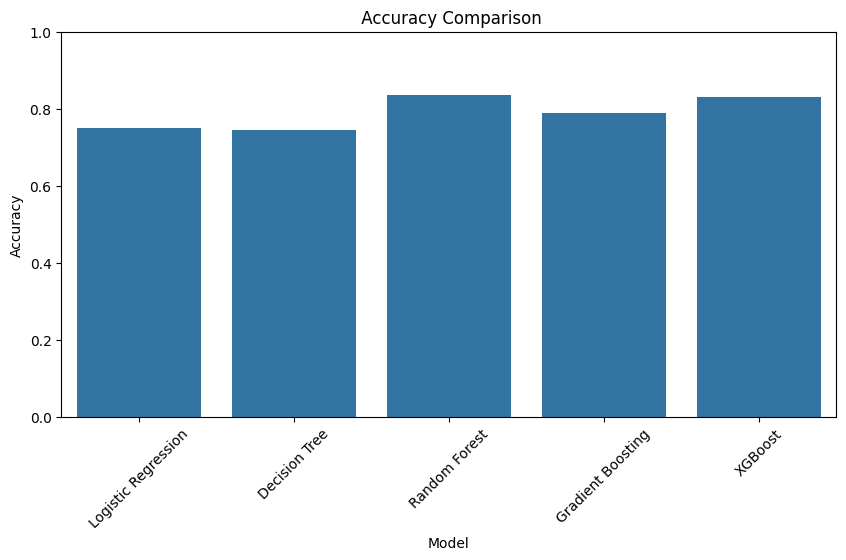

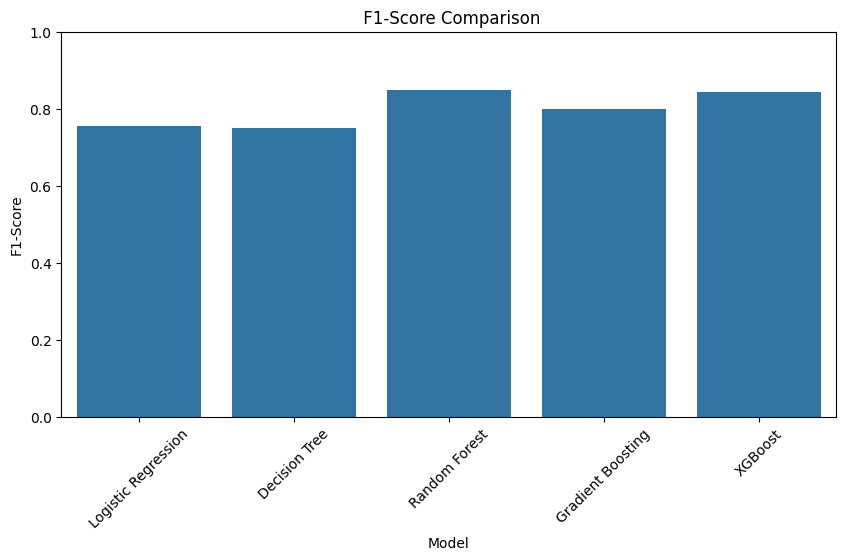

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Store performance metrics
results = []

# Evaluate each classifier
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store metrics in results
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    # Print Classification Report
    print(f"\n {name} - Classification Report")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n Summary of Performance Metrics:")
print(results_df)

# Bar plot for Accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title(" Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# Bar plot for F1-score comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='F1-Score', data=results_df)
plt.title(" F1-Score Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("diabetes.csv")


In [4]:
# Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


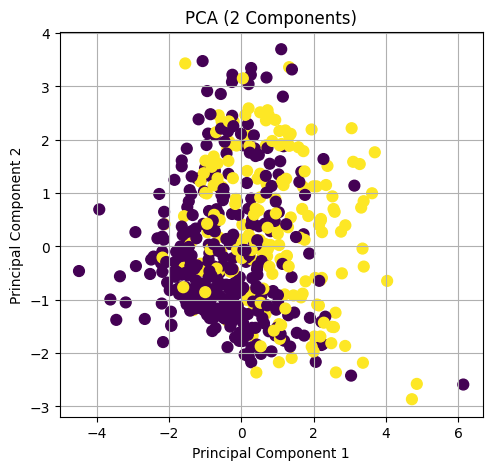

In [6]:
# PCA Feature Extraction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
#  Visualization
plt.figure(figsize=(12, 5))

# PCA Plot (2D)
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=60)
plt.title("PCA (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

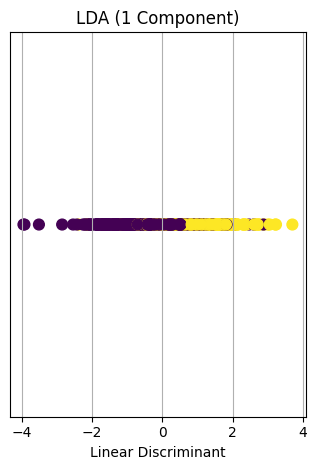

In [7]:
#  LDA Feature Extraction
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
# LDA Plot (1D)
plt.subplot(1, 2, 2)
plt.scatter(X_train_lda[:, 0], [0]*len(X_train_lda), c=y_train, cmap='viridis', s=60)
plt.title("LDA (1 Component)")
plt.xlabel("Linear Discriminant")
plt.yticks([])
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
#  Classification after PCA

# Logistic Regression with PCA
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)
y_pred_pca_logreg = logreg_pca.predict(pca.transform(X_test))

# Random Forest with PCA
rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X_train_pca, y_train)
y_pred_pca_rf = rf_pca.predict(pca.transform(X_test))

#  Classification after LDA

# Logistic Regression with LDA
logreg_lda = LogisticRegression()
logreg_lda.fit(X_train_lda, y_train)
y_pred_lda_logreg = logreg_lda.predict(lda.transform(X_test))

# Random Forest with LDA
rf_lda = RandomForestClassifier(random_state=42)
rf_lda.fit(X_train_lda, y_train)
y_pred_lda_rf = rf_lda.predict(lda.transform(X_test))


In [13]:
#  Accuracy Scores
print("Accuracy Results:")
print("PCA + Logistic Regression:", accuracy_score(y_test, y_pred_pca_logreg))
print("PCA + Random Forest:", accuracy_score(y_test, y_pred_pca_rf))
print("LDA + Logistic Regression:", accuracy_score(y_test, y_pred_lda_logreg))
print("LDA + Random Forest:", accuracy_score(y_test, y_pred_lda_rf))


Accuracy Results:
PCA + Logistic Regression: 0.696969696969697
PCA + Random Forest: 0.7142857142857143
LDA + Logistic Regression: 0.7272727272727273
LDA + Random Forest: 0.696969696969697
